# Chapter 10 A/B Testing
**Learning Objectives:**
- A/B Testing
- A/B/n Testing

### (A) A/B Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Data
conversions = np.array([90, 120])
visitors = np.array([500, 500])
labels = ['Blue Button (A)', 'Green Button (B)']
colors = ['blue', 'green']

# Conversion rates
conversion_rates = conversions / visitors
conversion_rates

array([0.18, 0.24])

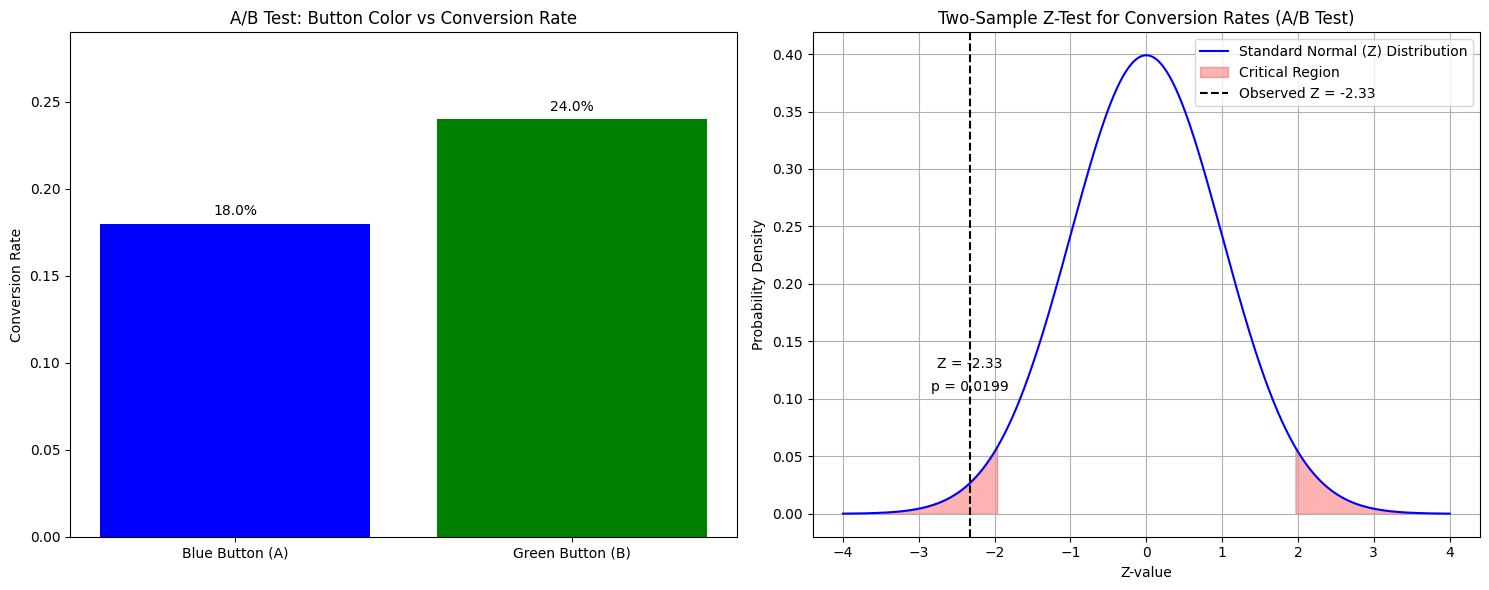

Z-statistic: -2.33, p-value: 0.0199
Conclusion: Reject the null hypothesis. Conversion rates are significantly different.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Data
conversions = np.array([90, 120])
visitors = np.array([500, 500])
labels = ['Blue Button (A)', 'Green Button (B)']
colors = ['blue', 'green']

# Conversion rates
conversion_rates = conversions / visitors

# Visualization 1: Bar chart of conversion rates
plt.figure(figsize=(15, 6))

# First plot (A/B Test Bar Chart)
plt.subplot(1, 2, 1)
plt.bar(labels, conversion_rates, color=colors)
plt.ylabel('Conversion Rate')
plt.title('A/B Test: Button Color vs Conversion Rate')
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.005, f"{rate:.1%}", ha='center')
plt.ylim(0, max(conversion_rates) + 0.05)

# A/B Test Z-Test for Visualization 2
# Conversion rates for z-test
p1 = conversions[0] / visitors[0]
p2 = conversions[1] / visitors[1]
p_pool = sum(conversions) / sum(visitors)
se = np.sqrt(p_pool * (1 - p_pool) * (1/visitors[0] + 1/visitors[1]))
z_stat = (p1 - p2) / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

# Second plot (Z-test Distribution)
x = np.linspace(-4, 4, 1000)
z_dist = stats.norm.pdf(x)

plt.subplot(1, 2, 2)
plt.plot(x, z_dist, label="Standard Normal (Z) Distribution", color="blue")

# Critical Z-value for 95% confidence level (two-tailed)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)

# Shade critical regions
plt.fill_between(x, z_dist, where=(x >= z_critical), color='red', alpha=0.3, label="Critical Region")
plt.fill_between(x, z_dist, where=(x <= -z_critical), color='red', alpha=0.3)

# Mark observed Z-statistic
plt.axvline(z_stat, color='black', linestyle='--', label=f'Observed Z = {z_stat:.2f}')
plt.text(z_stat, stats.norm.pdf(z_stat) + 0.10, f'Z = {z_stat:.2f}', color='black', ha='center')
plt.text(z_stat, stats.norm.pdf(z_stat) + 0.08, f'p = {p_value:.4f}', color='black', ha='center')

# Labels and legend
plt.title("Two-Sample Z-Test for Conversion Rates (A/B Test)")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Output results
print(f"Z-statistic: {z_stat:.2f}, p-value: {p_value:.4f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. Conversion rates are significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in conversion rates.")


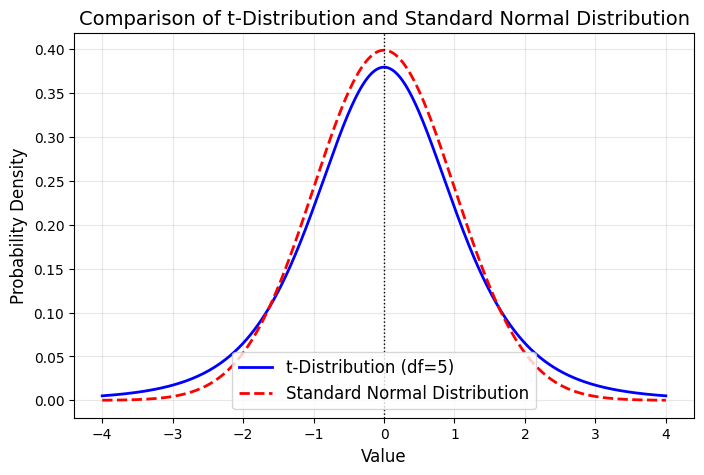

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)

# Compute the PDFs for t-distribution and standard normal distribution
df = 5  # Suppose there are only 6 data points. The degrees of freedom is n - 1 = 6 - 1 = 5.
t_pdf = t.pdf(x, df)  # T-distribution with df = 5
norm_pdf = norm.pdf(x)  # Standard normal distribution

# Plot the distributions
plt.figure(figsize=(8, 5))
plt.plot(x, t_pdf, label=f't-Distribution (df={df})', color='blue', linewidth=2)
plt.plot(x, norm_pdf, label='Standard Normal Distribution', color='red', linestyle='--', linewidth=2)

# Add labels, legend, and title
plt.title("Comparison of t-Distribution and Standard Normal Distribution", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.axvline(0, color='black', linestyle=':', linewidth=1)  # Highlight the mean
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

## (B) A/B/n Testing

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Applications': [300] * 16,
    'Type': ['Loan', 'Loan', 'Loan', 'Loan', 'Loan', 'Loan', 'Loan', 'Loan', 
                     'Saving', 'Saving', 'Saving', 'Saving', 'Saving', 'Saving', 'Saving', 'Saving'],
    'Region': ['Midwest', 'Midwest', 'Midwest', 'Midwest', 'Northeast', 'Northeast', 'Northeast', 'Northeast', 
               'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Northeast', 'Northeast', 'Northeast', 'Northeast'],
    'Description': ['High', 'High', 'Current', 'Current', 'High', 'High', 'Current', 'Current', 
                    'High', 'High', 'Current', 'Current', 'High', 'High', 'Current', 'Current'],
    'Example': ['With', 'W/o', 'With', 'W/o', 'With', 'W/o', 'With', 'W/o', 
                'With', 'W/o', 'With', 'W/o', 'With', 'W/o', 'With', 'W/o'],
    'Complete': [95.7, 77.6, 94.2, 68.2, 98.1, 95.0, 91.6, 63.6, 
                        99.6, 81.1, 90.2, 68.7, 97.1, 75.6, 89.1, 70.6],
    'Std. Dev.': [9.2, 9.3, 9.3, 9.2, 7.6, 7.2, 7.9, 7.7, 
                  9.3, 9.4, 9.2, 9.6, 7.7, 7.8, 7.5, 7.9]
}

# Creating DataFrame
df = pd.DataFrame(data)
df.head()

,Applications,Type,Region,Description,Example,Complete,Std. Dev.
0,300,Loan,Midwest,High,With,95.7,9.2
1,300,Loan,Midwest,High,W/o,77.6,9.3
2,300,Loan,Midwest,Current,With,94.2,9.3
3,300,Loan,Midwest,Current,W/o,68.2,9.2
4,300,Loan,Northeast,High,With,98.1,7.6


In [5]:
# Fit Two-Way ANOVA model for 'Avg. % Complete' with 'Account Type' and 'Description' as factors
model = ols('Complete ~ C(Region) + C(Type) + C(Description) + C(Example) + C(Type) * C(Description) + C(Example) * C(Description) ', data=df).fit()

# Perform ANOVA (Type 2)
anova_table = sm.stats.anova_lm(model, typ=2)


# Print ANOVA table
print(anova_table)


                              sum_sq   df          F    PR(>F)
C(Region)                     1.8225  1.0   0.064138  0.805761
C(Type)                       9.0000  1.0   0.316731  0.587322
C(Description)              436.8100  1.0  15.372364  0.003507
C(Example)                 1505.4400  1.0  52.979950  0.000047
C(Type):C(Description)       12.2500  1.0   0.431106  0.527876
C(Example):C(Description)    67.2400  1.0   2.366333  0.158359
Residual                    255.7375  9.0        NaN       NaN


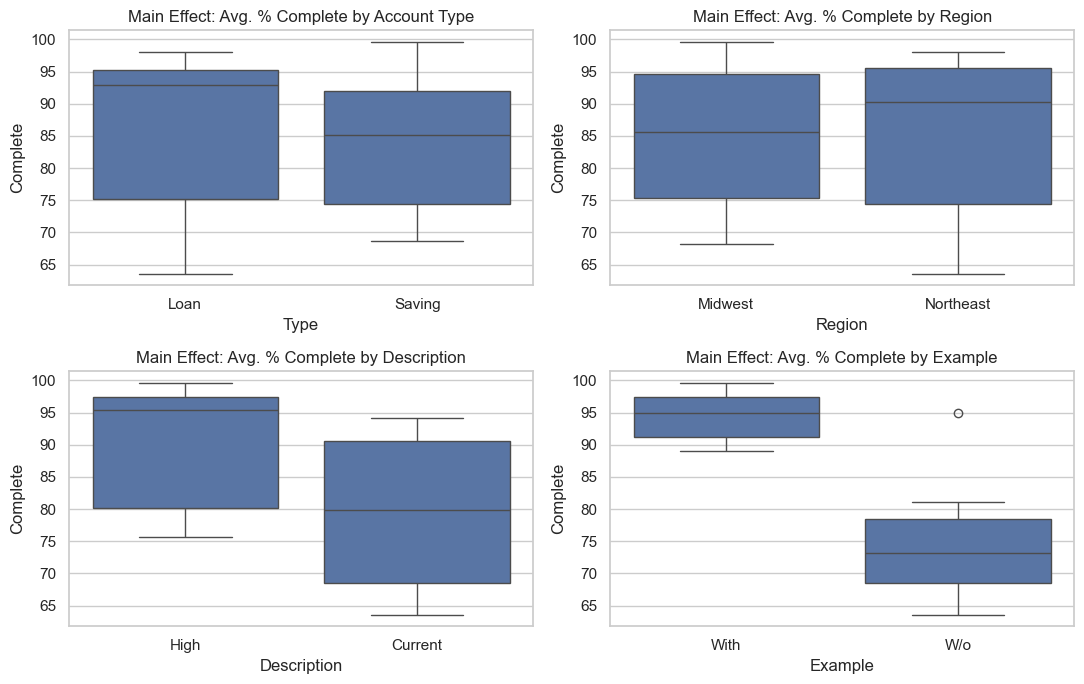

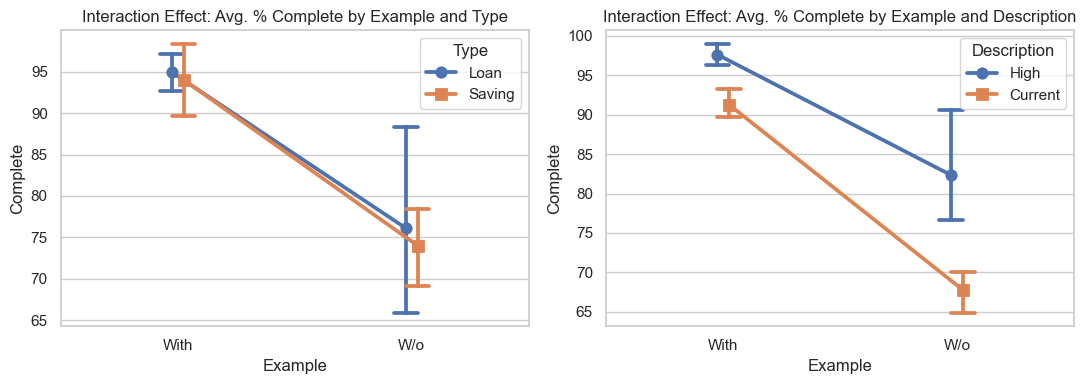

In [6]:
# Set seaborn style
sns.set(style="whitegrid")

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(11, 7))

# Plot 1: Account Type
sns.boxplot(x='Type', y='Complete', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Main Effect: Avg. % Complete by Account Type')

# Plot 2: Region
sns.boxplot(x='Region', y='Complete', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Main Effect: Avg. % Complete by Region')

# Plot 3: Description
sns.boxplot(x='Description', y='Complete', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Main Effect: Avg. % Complete by Description')

# Plot 4: Example
sns.boxplot(x='Example', y='Complete', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Main Effect: Avg. % Complete by Example')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Set seaborn style
sns.set(style="whitegrid")

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# Plot 1: Interaction of Example and Type
sns.pointplot(x='Example', y='Complete', hue='Type', data=df, dodge=True, 
              markers=["o", "s"], capsize=0.1, ax=axs[0])
axs[0].set_title('Interaction Effect: Avg. % Complete by Example and Type')

# Plot 2: Interaction of Example and Description
sns.pointplot(x='Example', y='Complete', hue='Description', data=df, dodge=True, 
              markers=["o", "s"], capsize=0.1, ax=axs[1])
axs[1].set_title('Interaction Effect: Avg. % Complete by Example and Description')

# Adjust layout
plt.tight_layout()
plt.show()